# Assignment Sesi 17

This assignment will be using [this dataset (Diabetes Dataset)](https://raw.githubusercontent.com/stefkwan-h8/dataset/main/diabetes.csv) to be clean, pattern looking, and filtering.

This analysis will be using Python with Pandas and NumPY library

In [46]:
# Nomor 1 - Import Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df_diabetes = pd.read_csv("https://raw.githubusercontent.com/stefkwan-h8/dataset/main/diabetes.csv")
df_diabetes

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [2]:
# Nomor 2
# Check Missing Values First

df_diabetes.isnull().sum()


Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [30]:
# Check Invalid Values
df_diabetes["BMI"].value_counts()

BMI
32.0    13
31.6    12
31.2    12
0.0     11
32.4    10
        ..
36.7     1
41.8     1
42.6     1
42.8     1
46.3     1
Name: count, Length: 248, dtype: int64

Menurut saya, BMI tidak mungkin 0. Hal ini menunjukkan data yang menurut saya tidak masuk akal

Selain itu, data tersebut hanya terdapat 11 baris dari 248 baris data sehingga saya memutuskan untuk memfilter hal tersebut

In [31]:
bmi_0 = (df_diabetes_filtered["BMI"] == 0)

df_diabetes_filtered = df_diabetes_filtered.drop(df_diabetes_filtered[bmi_0].index)
df_diabetes_filtered[bmi_0]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome


Untuk memutuskan merubah atau tidak tipe data yang ada pada DataFrame diabetes, saya melakukan pengecekan terdapat apa saja tipe data yang ada

In [32]:
# Checking Data Type of Diabetes DataFrame
df_diabetes_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 757 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               757 non-null    int64  
 1   Glucose                   757 non-null    int64  
 2   BloodPressure             757 non-null    int64  
 3   SkinThickness             757 non-null    int64  
 4   Insulin                   757 non-null    int64  
 5   BMI                       757 non-null    float64
 6   DiabetesPedigreeFunction  757 non-null    float64
 7   Age                       757 non-null    int64  
 8   Outcome                   757 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 59.1 KB


Menurut saya, dikarenakan outcome hanya mengeluarkan 2 jenis (1/0) yang menandakan apakah mereka terkena diabetes atau tidak

Saya memutuskan untuk mengubah tipe data tersebut menjadi Boolean sehingga dapat makin terlihat apakah artinya

In [33]:
# Changing Data Type of Outcome from int64 to Boolean

df_diabetes_filtered["Outcome"] = df_diabetes_filtered["Outcome"].astype(bool)
df_diabetes_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 757 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               757 non-null    int64  
 1   Glucose                   757 non-null    int64  
 2   BloodPressure             757 non-null    int64  
 3   SkinThickness             757 non-null    int64  
 4   Insulin                   757 non-null    int64  
 5   BMI                       757 non-null    float64
 6   DiabetesPedigreeFunction  757 non-null    float64
 7   Age                       757 non-null    int64  
 8   Outcome                   757 non-null    bool   
dtypes: bool(1), float64(2), int64(6)
memory usage: 54.0 KB


In [35]:
# Showing Diabetes DataFrame after Changing "Outcome" from int64 to bool
df_diabetes_filtered

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,True
1,1,85,66,29,0,26.6,0.351,31,False
2,8,183,64,0,0,23.3,0.672,32,True
3,1,89,66,23,94,28.1,0.167,21,False
4,0,137,40,35,168,43.1,2.288,33,True
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,False
764,2,122,70,27,0,36.8,0.340,27,False
765,5,121,72,23,112,26.2,0.245,30,False
766,1,126,60,0,0,30.1,0.349,47,True


# Nomor 3
Untuk Groupby dan aggregate, saya ingin melihat perbandingan antara kehamilan dengan keterjadiannya diabetes kepada seseorang

Saya akan menghitung jumlah orang yang terkena diabetes dan dikelompokkan dengan seberapa banyak kehamilan yang terjadi.

In [42]:
# Nomor 3
# Group By Pregnancies for Counting Outcome
df_diab_preg_out = df_diabetes_filtered.groupby(["Pregnancies", "Outcome"])["Outcome"].count()
df_diab_preg_out

Pregnancies  Outcome
0            False       70
             True        38
1            False      106
             True        29
2            False       82
             True        19
3            False       47
             True        27
4            False       45
             True        23
5            False       35
             True        21
6            False       33
             True        16
7            False       19
             True        25
8            False       16
             True        21
9            False       10
             True        18
10           False       14
             True         9
11           False        4
             True         7
12           False        5
             True         4
13           False        5
             True         5
14           True         2
15           True         1
17           True         1
Name: Outcome, dtype: int64

# Nomor 4
Nomor 4 dikarenakan sebelumnya sudah melakukan filter, sehingga saya memutuskan untuk tidak melakukan pemfilteran lagi

# Nomor 5
Untuk perubahan kolom, saya memutuskan untuk merubah kolom yang ada pada "Outcome" menjadi "Diabetes" sehingga menunjukkan secara langsung apakah orang tersebut kena diabetes atau tidak

In [43]:
df_diabetes_filtered.rename(columns={"Outcome":"Diabetes"})

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Diabetes
0,6,148,72,35,0,33.6,0.627,50,True
1,1,85,66,29,0,26.6,0.351,31,False
2,8,183,64,0,0,23.3,0.672,32,True
3,1,89,66,23,94,28.1,0.167,21,False
4,0,137,40,35,168,43.1,2.288,33,True
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,False
764,2,122,70,27,0,36.8,0.340,27,False
765,5,121,72,23,112,26.2,0.245,30,False
766,1,126,60,0,0,30.1,0.349,47,True


# Nomor 6
Visualisasi yang akan saya tampilkan adalah rata-rata BMI per Umur

In [50]:
df_diab_age_bmi = df_diabetes_filtered.groupby("Age")["BMI"].mean()
df_diab_age_bmi

Age
21    29.208333
22    30.352857
23    31.502632
24    33.293333
25    32.623404
26    36.006250
27    31.950000
28    33.642857
29    33.541379
30    31.535000
31    34.016667
32    32.318750
33    32.335294
34    31.164286
35    33.780000
36    31.718750
37    32.078947
38    35.568750
39    31.983333
40    33.538462
41    35.259091
42    34.983333
43    36.892308
44    34.162500
45    34.960000
46    34.523077
47    34.566667
48    29.980000
49    32.020000
50    31.225000
51    33.975000
52    33.475000
53    30.500000
54    36.960000
55    27.025000
56    31.700000
57    29.700000
58    32.428571
59    26.966667
60    28.740000
61    30.000000
62    28.950000
63    30.775000
64    25.000000
65    31.600000
66    30.375000
67    28.766667
68    35.600000
69    26.800000
70    32.500000
72    19.600000
81    25.900000
Name: BMI, dtype: float64

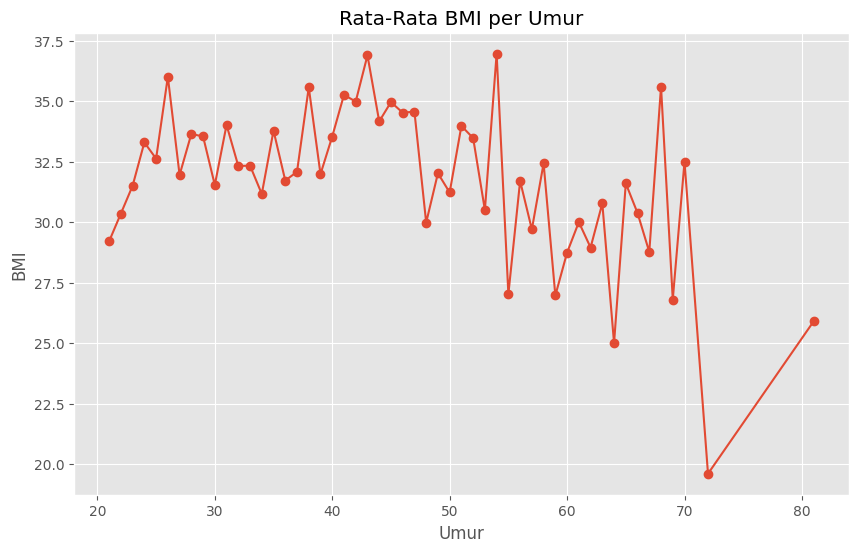

In [51]:
# Style Plot
plt.style.use("ggplot")

# Creating Plot
df_diab_age_bmi.plot(marker="o", figsize=(10,6))

# Putting title to the Plot
plt.title("Rata-Rata BMI per Umur")

# Ganti judul Axis
plt.xlabel("Umur")
plt.ylabel("BMI")

plt.show()